In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("fivethirtyeight")
pd.set_option("float_format", "{:.3f}".format)

In [2]:
data = pd.read_csv("ifood_df.csv")
data.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.000,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.000,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.000,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.000,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.000,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# Data summary

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [5]:
data.duplicated().sum()

184

In [6]:
data[data.duplicated(keep=False)].sort_values(by="Income")

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
28,10979.000,0,0,34,8,4,10,2,2,4,...,0,0,0,0,0,1,0,26,22,0
1118,10979.000,0,0,34,8,4,10,2,2,4,...,0,0,0,0,0,1,0,26,22,0
246,15287.000,1,0,60,1,2,8,4,3,13,...,0,0,0,0,1,0,0,18,5,1
1183,15287.000,1,0,60,1,2,8,4,3,13,...,0,0,0,0,1,0,0,18,5,1
1087,15315.000,0,0,27,7,4,13,15,8,17,...,0,0,1,0,0,0,0,47,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,87771.000,0,1,61,1492,38,287,50,57,33,...,1,0,0,0,1,0,0,1924,1891,4
1280,94384.000,0,0,62,1111,24,790,160,45,172,...,1,0,0,0,1,0,0,2130,1958,3
923,94384.000,0,0,62,1111,24,790,160,45,172,...,1,0,0,0,1,0,0,2130,1958,3
1093,98777.000,0,0,23,1000,19,711,125,115,38,...,0,0,0,0,0,1,0,1970,1932,1


In [7]:
data.drop_duplicates(keep="first", inplace=True)

- No NAs
- 184 duplicated entries were removed

In [8]:
data.iloc[:, :10].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000
mean,51687.259,0.443,0.510,48.881,306.492,26.365,166.060,37.604,27.269,43.922
std,20713.046,0.536,0.546,28.951,337.604,39.777,219.869,54.892,41.575,51.678
min,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,35416.000,0.000,0.000,24.000,24.000,2.000,16.000,3.000,1.000,9.000
50%,51412.000,0.000,0.000,49.000,178.000,8.000,68.000,12.000,8.000,25.000
75%,68274.000,1.000,1.000,74.000,507.000,33.000,230.000,50.000,34.000,56.000
max,113734.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,262.000,321.000


In [9]:
data.iloc[:, 10:20].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
count,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000
mean,2.330,4.115,2.645,5.808,5.340,0.075,0.077,0.072,0.066,0.013
std,1.893,2.754,2.799,3.230,2.426,0.263,0.266,0.259,0.248,0.113
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000
50%,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000
75%,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000
max,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000


In [10]:
data.iloc[:, 21:].describe()

,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000,2021.000
mean,3.000,11.000,0.154,51.117,2511.613,0.106,0.388,0.219,0.252,0.035,0.091,0.024,0.502,0.166,0.217,563.789,519.867,0.302
std,0.000,0.000,0.361,11.668,202.547,0.308,0.488,0.414,0.434,0.183,0.287,0.154,0.500,0.372,0.412,576.776,554.798,0.681
min,3.000,11.000,0.000,24.000,2159.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,-283.000,0.000
25%,3.000,11.000,0.000,43.000,2337.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,55.000,42.000,0.000
50%,3.000,11.000,0.000,50.000,2511.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,343.000,288.000,0.000
75%,3.000,11.000,0.000,61.000,2688.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,964.000,883.000,0.000
max,3.000,11.000,1.000,80.000,2858.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2491.000,2458.000,4.000


- MntRegularProds has negative values, which shouldn't be possible

In [11]:
data[data.MntRegularProds < 0]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1307,6560.000,0,0,2,67,11,26,4,3,262,...,0,0,0,0,0,1,0,111,-151,0
1780,7144.000,0,2,92,81,4,33,5,2,291,...,0,0,0,0,0,0,1,125,-166,0
1949,4428.000,0,1,0,16,4,12,2,4,321,...,0,0,0,0,1,0,0,38,-283,0


- As it's only 3 entries, I decided to drop them

In [12]:
data.drop(data[data.MntRegularProds < 0].index, inplace=True)

In [13]:
data.shape

(2018, 39)

Finding boolean columns

In [14]:
boolean_cols = data.columns[data.isin([0, 1]).all()]

In [15]:
data[boolean_cols] = data[boolean_cols].astype("bool")

# Continuous variables

In [16]:
continuous_cols = data.select_dtypes("number").columns
continuous_cols.shape

(22,)

In [17]:
continuous_cols

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue', 'Age', 'Customer_Days', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

## Income

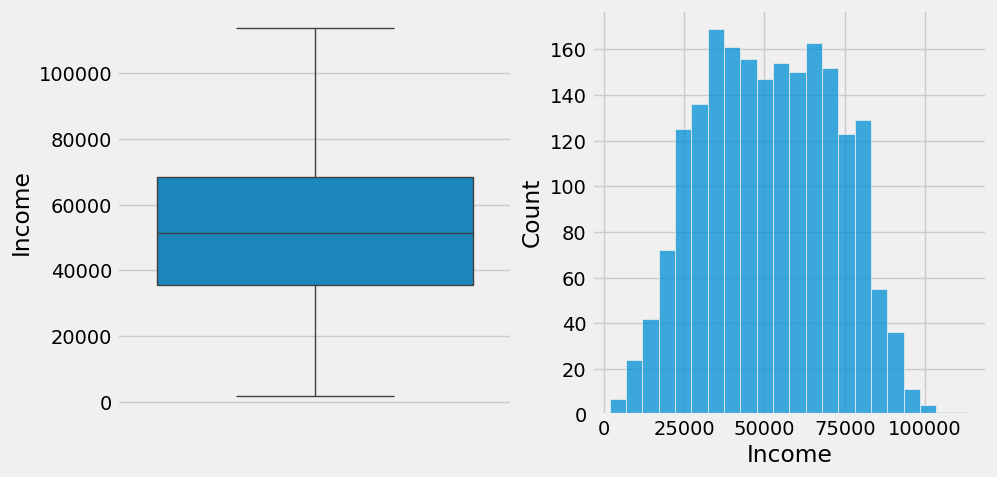

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs = axs.flatten()

sns.boxplot(data.Income, ax=axs[0])
_ = sns.histplot(data.Income, ax=axs[1])

- It follows a normal distribution with no outliers

## Kids and Teens

In [19]:
data["MinorsAtHome"] = data.Kidhome + data.Teenhome
minors_cols = ["MinorsAtHome", "Kidhome", "Teenhome"]
continuous_cols = np.append(continuous_cols, "MinorsAtHome")

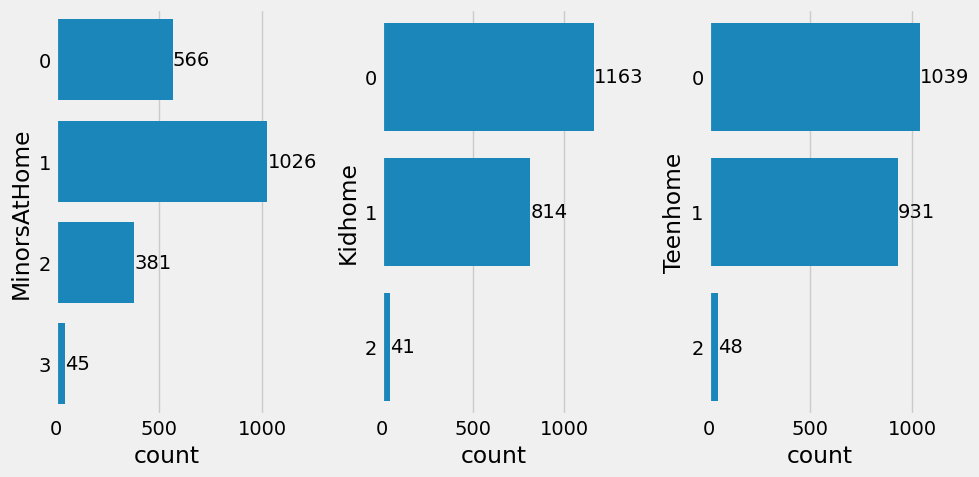

In [20]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 5))
axs = axs.flatten()

for i, col in enumerate(minors_cols):
    p = sns.countplot(y=data[col], ax=axs[i])
    p.bar_label(axs[i].containers[0])
fig.tight_layout()

- Most costumers have at least one dependant at home

## Amount Spent

In [21]:
data["TotalMntSpent"] = (
    data["MntWines"]
    + data["MntFruits"]
    + data["MntMeatProducts"]
    + data["MntFishProducts"]
    + data["MntSweetProducts"]
    + data["MntGoldProds"]
    + data["MntRegularProds"]
)
mnt_spent_cols = [
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "MntRegularProds",
    "TotalMntSpent",
]
continuous_cols = np.append(continuous_cols, "TotalMntSpent")

- The column MntTotal seems to have the same intention as TotalMntSpent, but doesn't take into consideration all Mnt_ columns, so TotalMntSpent will be used instead

In [22]:
data.drop("MntTotal", axis=1, inplace=True)

In [23]:
continuous_cols = np.delete(
    continuous_cols, np.where(np.isin(continuous_cols, ["MntTotal"]))
)

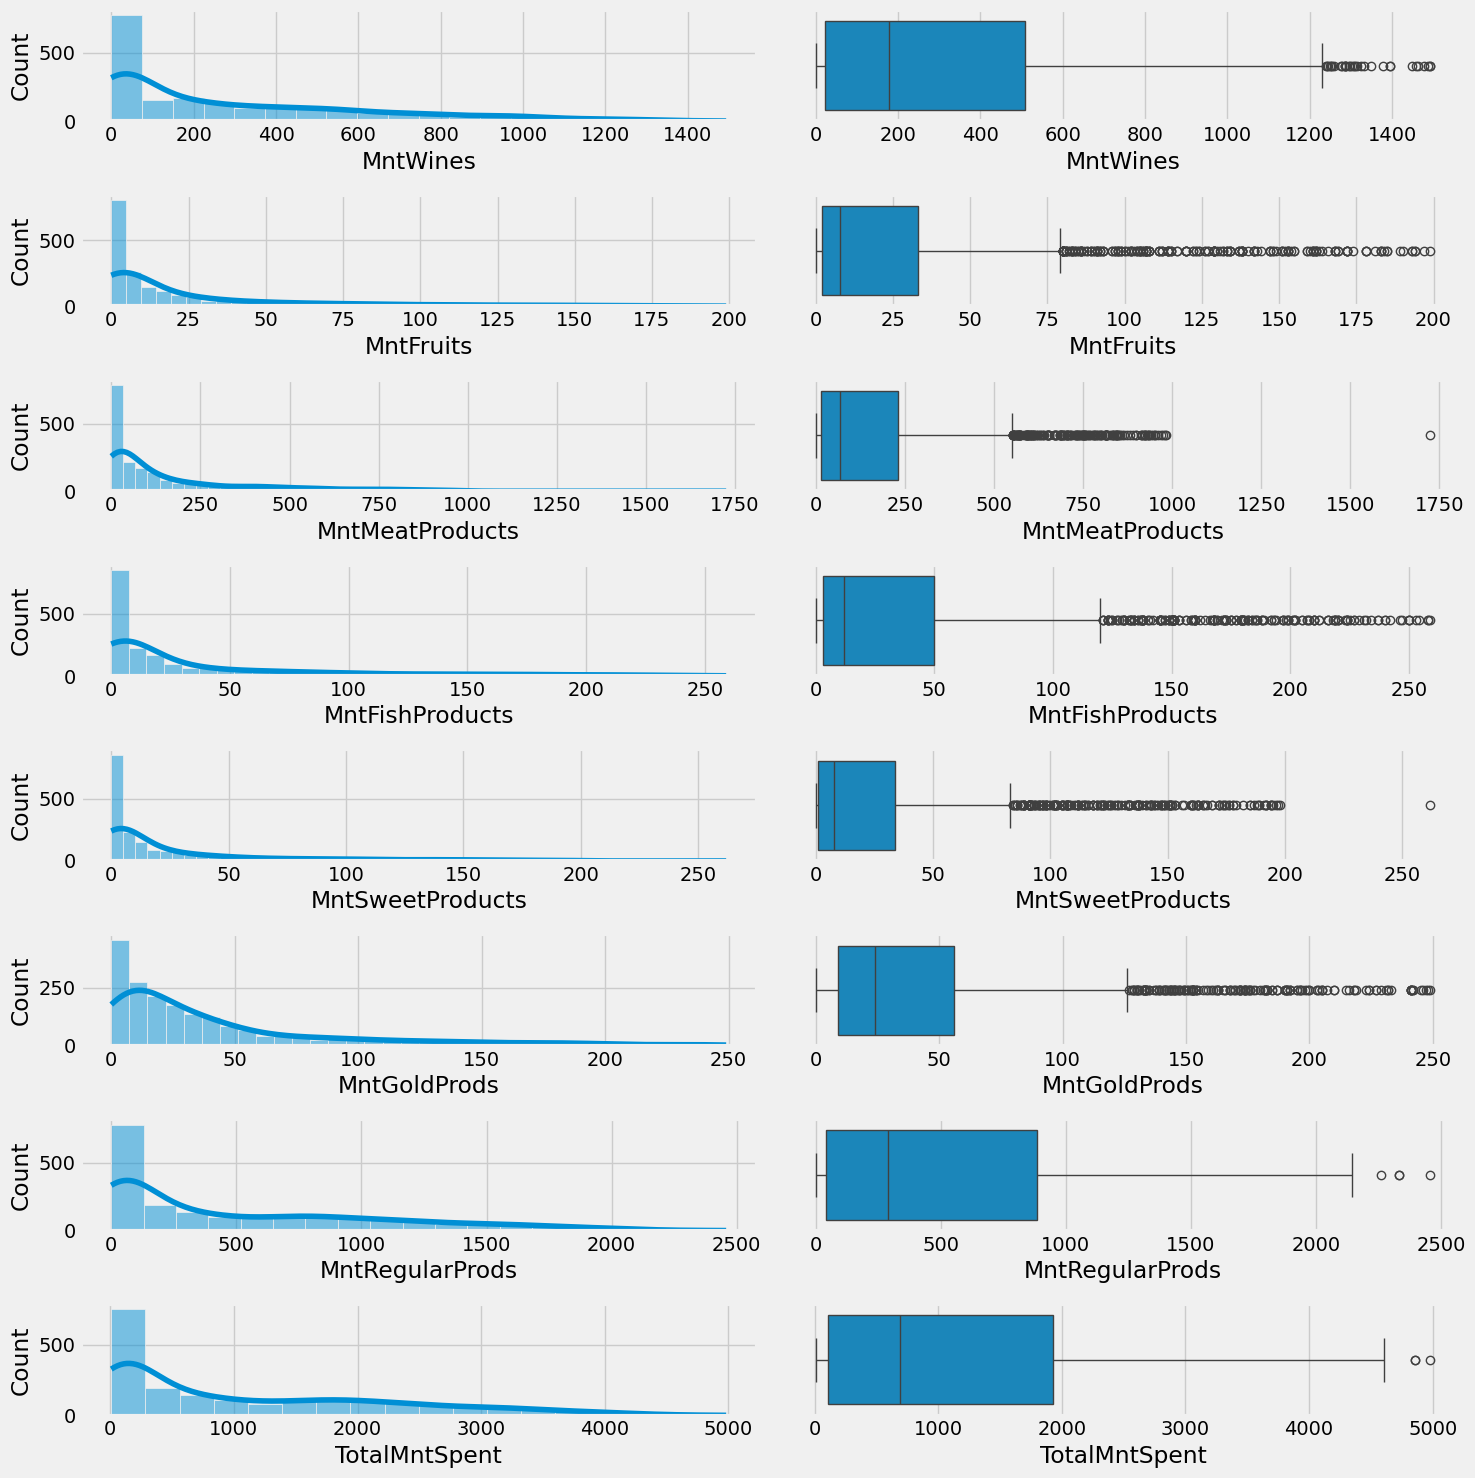

In [24]:
fig, axs = plt.subplots(nrows=len(mnt_spent_cols), ncols=2, figsize=(15, 15))

for i, col in enumerate(mnt_spent_cols):
    sns.histplot(x=data[col], kde=True, ax=axs[i][0])
    sns.boxplot(x=data[col], ax=axs[i][1])
fig.tight_layout()

- Highly skewed distributions, with all categories having mostly costumers having no amount spent

## Recency

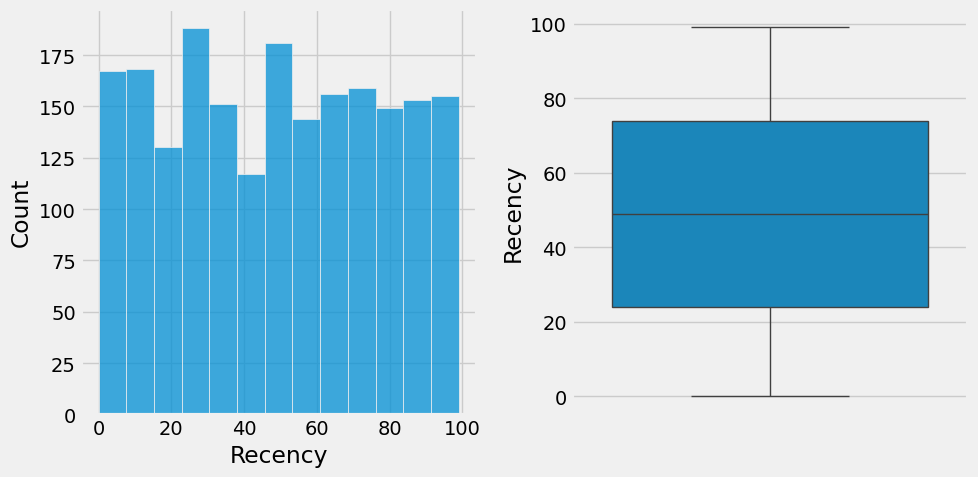

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs = axs.flatten()
sns.histplot(data.Recency, ax=axs[0])
sns.boxplot(data.Recency, ax=axs[1])
fig.tight_layout()

- Clients have from 0 to 100 days since their last purchase

## Context of purchase

In [26]:
ctxs_of_purchase = [
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
]

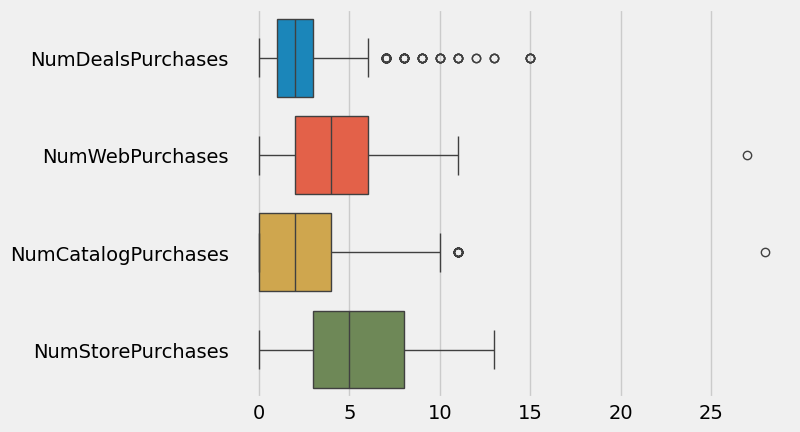

In [27]:
p = sns.boxplot(data[ctxs_of_purchase], orient="h")

- Most costumers use the store and web

## Number of web visits per month

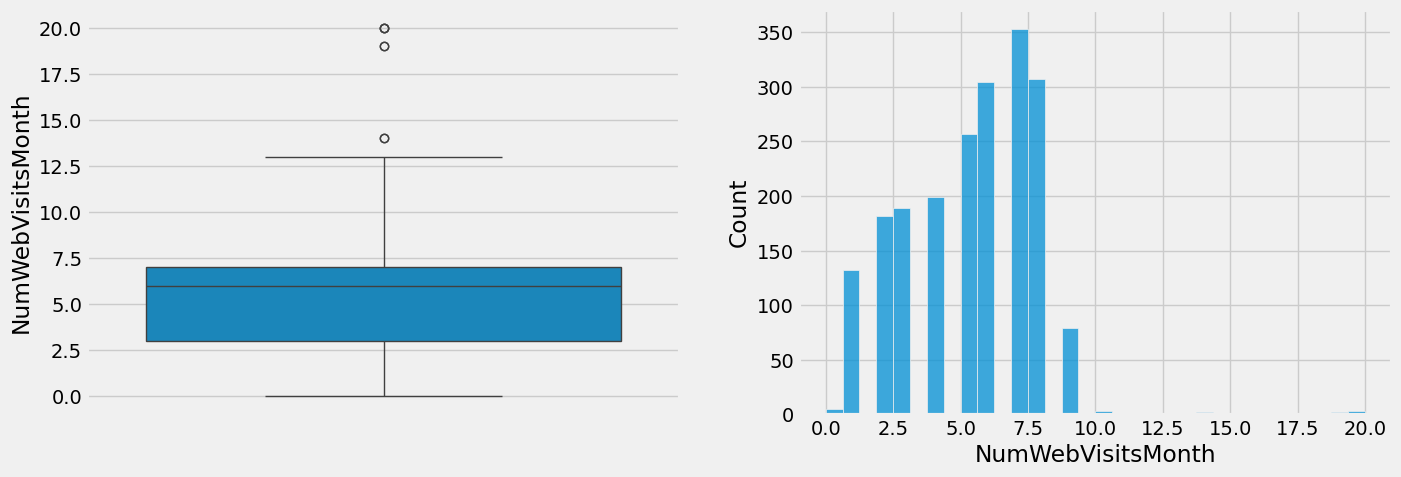

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.boxplot(data["NumWebVisitsMonth"], ax=axs[0])
_ = sns.histplot(data["NumWebVisitsMonth"], ax=axs[1])

## Customer Days

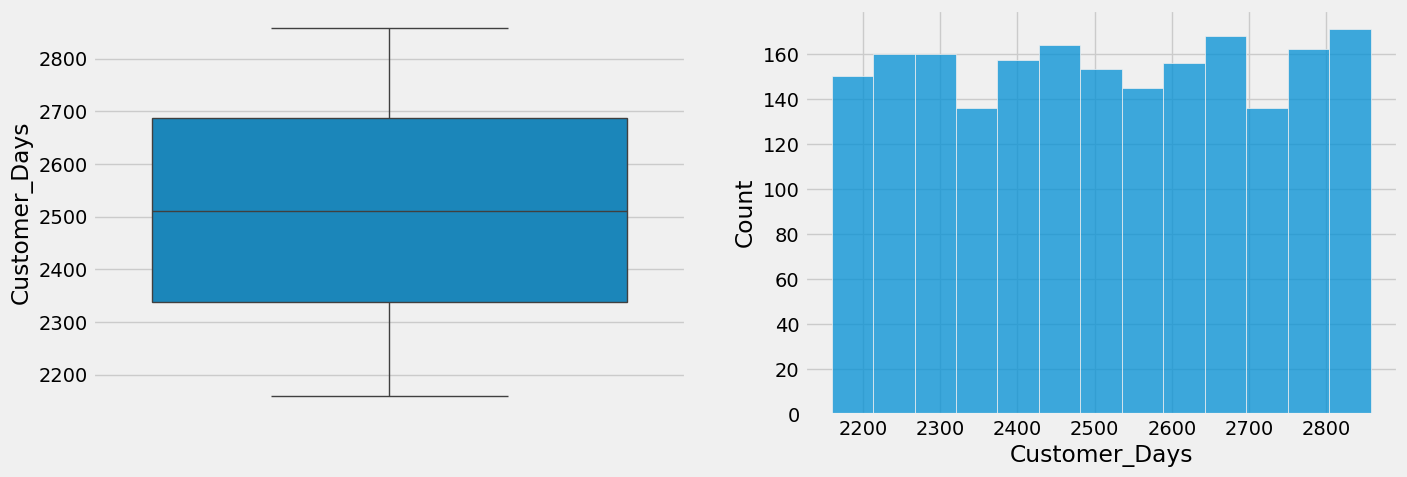

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.boxplot(data["Customer_Days"], ax=axs[0])
_ = sns.histplot(data["Customer_Days"], ax=axs[1])

- Theres no explanation of what this variable represents, but it seems to indicate how long the person has been a client

## Age

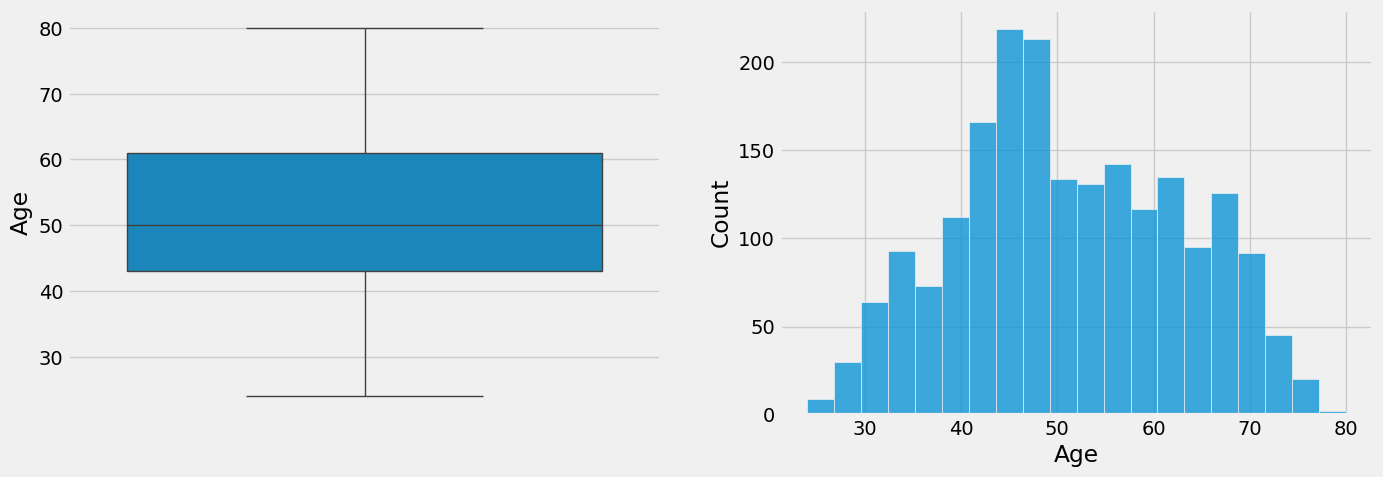

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.boxplot(data["Age"], ax=axs[0])
_ = sns.histplot(data["Age"], ax=axs[1])

- Customers are adults, mostly from 40 to 60 years old

## Number of accepted campaings

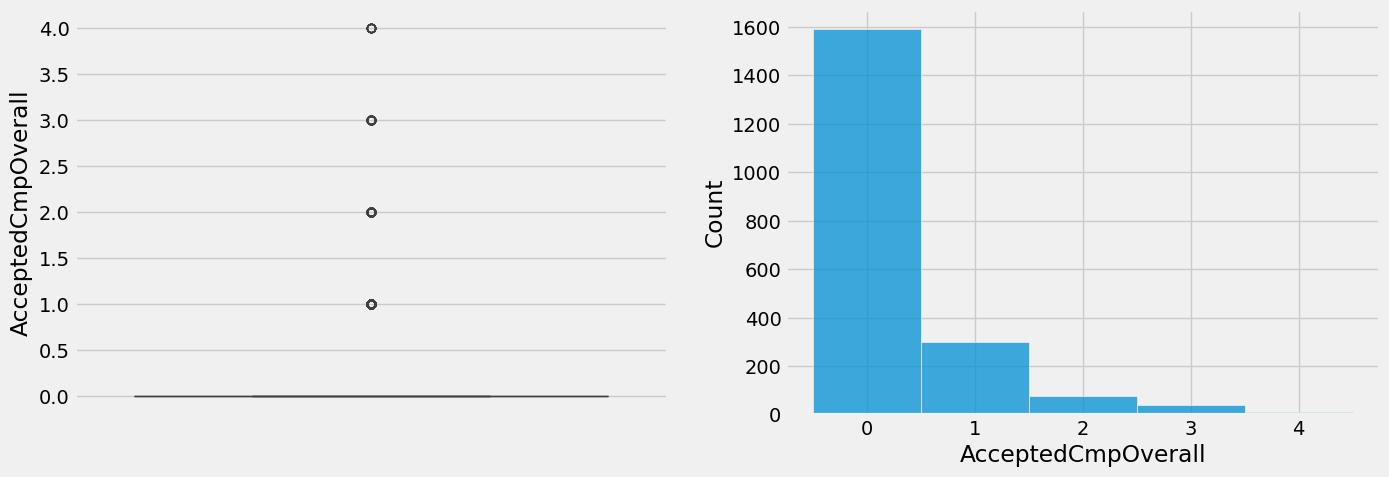

In [84]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.boxplot(data["AcceptedCmpOverall"], ax=axs[0])
_ = sns.histplot(data["AcceptedCmpOverall"], ax=axs[1], discrete=True)

- As expected, most costumers didn't accepted most campaigns. Doesn't include the last campaing (Response column)

## ZCost

Z_CostContact and Z_CostContact are constants, so they have no information

In [32]:
data.drop(["Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

In [33]:
continuous_cols = np.delete(
    continuous_cols, np.where(np.isin(continuous_cols, ["Z_CostContact", "Z_Revenue"]))
)

# Boolean columns

In [34]:
boolean_cols, boolean_cols.shape

(Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2', 'Complain', 'Response', 'marital_Divorced',
        'marital_Married', 'marital_Single', 'marital_Together',
        'marital_Widow', 'education_2n Cycle', 'education_Basic',
        'education_Graduation', 'education_Master', 'education_PhD'],
       dtype='object'),
 (17,))

## Accepted Campaigns

In [35]:
accepted_camp_cols = [
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "Response",
]

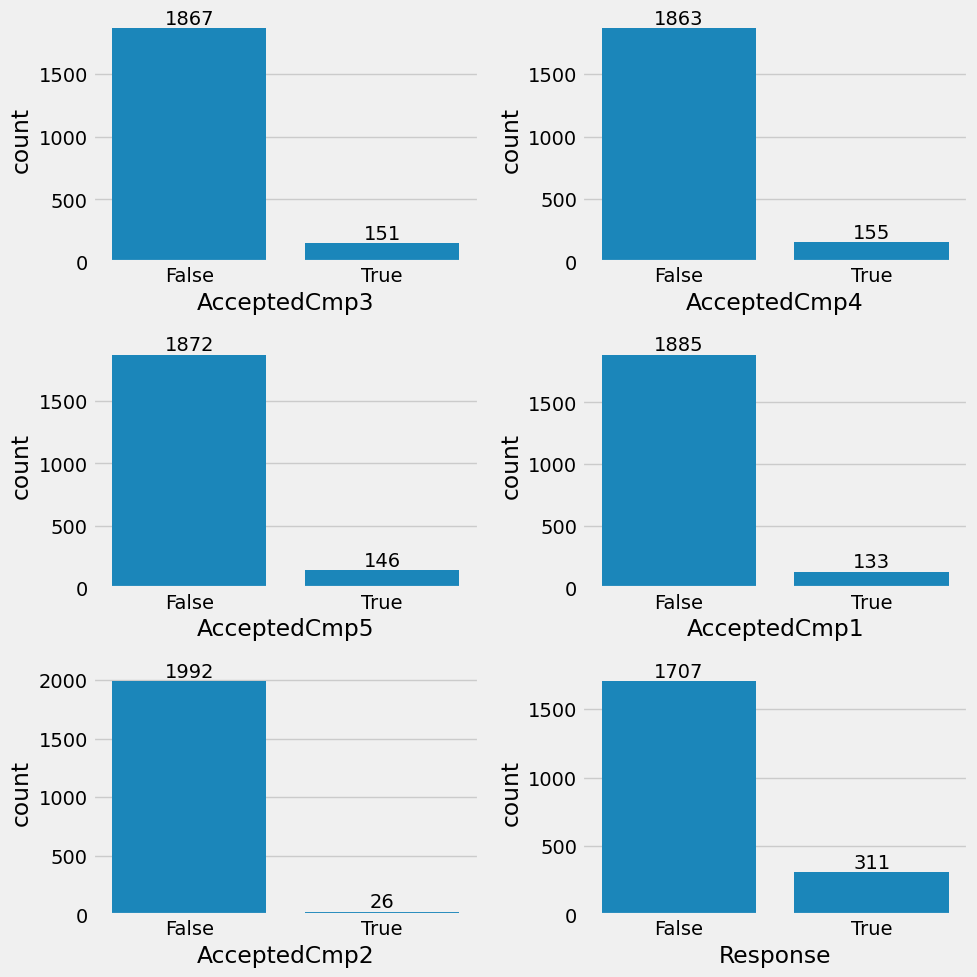

In [36]:
fig, axs = plt.subplots(
    nrows=int(len(accepted_camp_cols) / 2), ncols=2, figsize=(10, 10)
)
axs = axs.flatten()

for i, col in enumerate(accepted_camp_cols):
    p = sns.countplot(data=data, x=col, ax=axs[i])
    p.bar_label(axs[i].containers[0])
fig.tight_layout()

- The second campaign was by far the worst, while the last (Response) was the best so far. The other campaigns had relatively close results

## Marital situation

In [89]:
marital_cols = [
    "marital_Divorced",
    "marital_Married",
    "marital_Single",
    "marital_Together",
    "marital_Widow",
]


def make_marital_situation_col(row):
    if row["marital_Divorced"]:
        return "Divorced"
    if row["marital_Married"]:
        return "Maried"
    if row["marital_Single"]:
        return "Single"
    if row["marital_Together"]:
        return "Together"
    if row["marital_Widow"]:
        return "Widow"
    raise Exception("Missing informtion")


data["marital_status"] = data.apply(make_marital_situation_col, axis=1)
data["has_a_partner"] = data["marital_Married"] | data["marital_Together"]

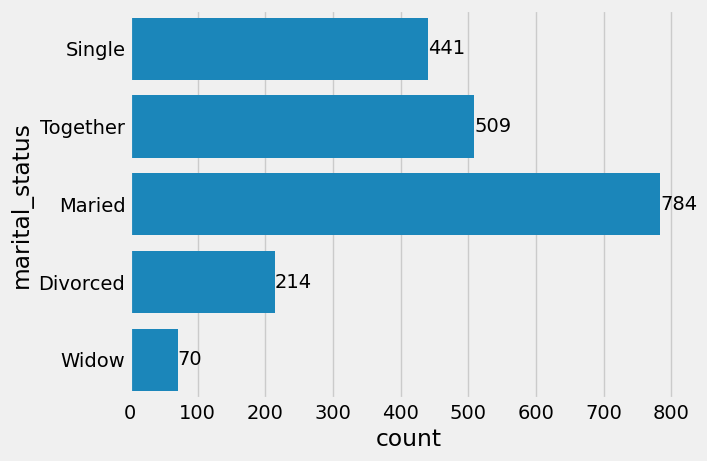

In [86]:
p = sns.countplot(data.marital_status)
_ = p.bar_label(p.containers[0])


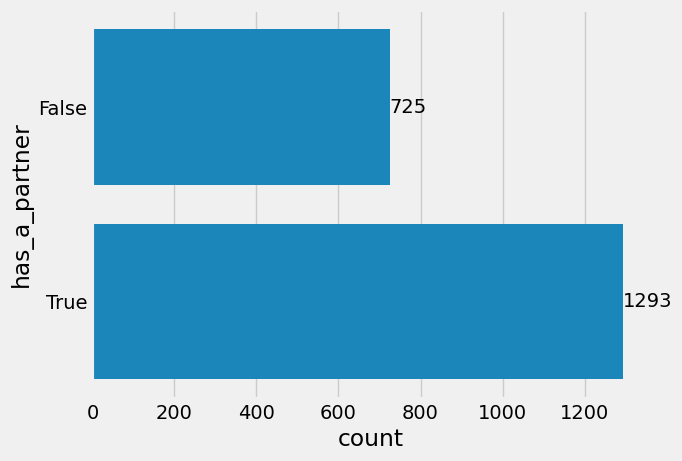

In [93]:
p = sns.countplot(y=data.has_a_partner)
_ = p.bar_label(p.containers[0])


- Most costumers have a partner

## Education

In [39]:
education_cols = [
    "education_2n Cycle",
    "education_Basic",
    "education_Graduation",
    "education_Master",
    "education_PhD",
]


def make_education_col(row):
    if row["education_2n Cycle"]:
        return "2n Cycle"
    if row["education_Basic"]:
        return "Basic"
    if row["education_Graduation"]:
        return "Graduation"
    if row["education_Master"]:
        return "Master"
    if row["education_PhD"]:
        return "PhD"
    raise Exception("Missing informtion")


data["education"] = data.apply(make_education_col, axis=1)

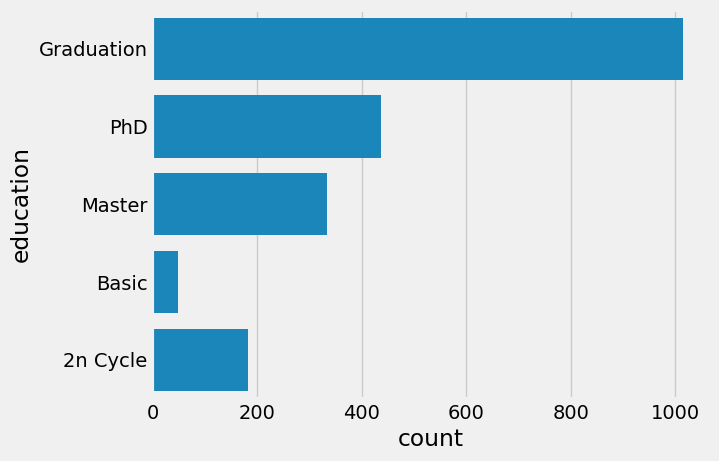

In [40]:
p = sns.countplot(data.education)

- Most costumers seem to have a high level of education

## Complaints

[Text(0, 0, '1999'), Text(0, 0, '19')]

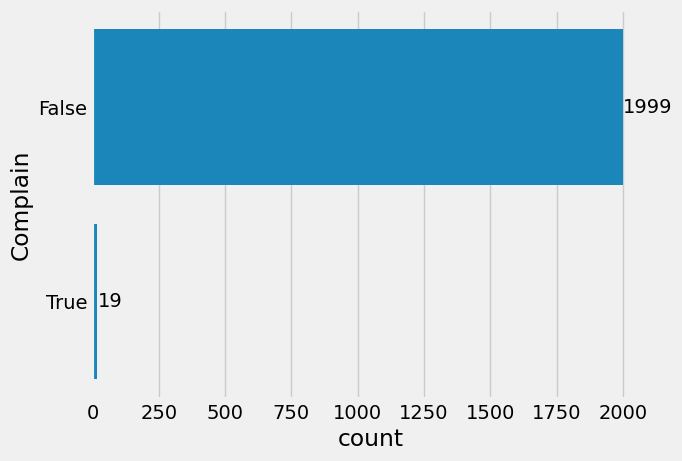

In [41]:
p = sns.countplot(y=data.Complain)
p.bar_label(p.containers[0])

- Very few compains

# Summary from univariate analysis

- Costumers profile is: a middle aged person with at least one dependant and high level of education

# Correlation with Response

In [42]:
from scipy.stats import pointbiserialr

corr_with_response = {}
for col in continuous_cols:
    c, p = pointbiserialr(data.Response, data[col])
    corr_with_response[col] = {"corr": c, "p-value": p}

In [43]:
pd.DataFrame(corr_with_response).T.sort_values(by="corr", ascending=False)

,corr,p-value
AcceptedCmpOverall,0.423,0.000
TotalMntSpent,0.261,0.000
MntRegularProds,0.257,0.000
MntMeatProducts,0.251,0.000
MntWines,0.237,0.000
NumCatalogPurchases,0.234,0.000
Customer_Days,0.190,0.000
Income,0.174,0.000
MntGoldProds,0.160,0.000
NumWebPurchases,0.152,0.000


- Costumers who have accepted previous campaigns and spent more are positively correlated with the acceptance of the last campaign

# Correlations among variables

As some variables don't follow a normal distribution, Spearman correlation is used instead os Pearson (which is the default for the corr function)

In [81]:
correlations = data.select_dtypes("number").corr("spearman")

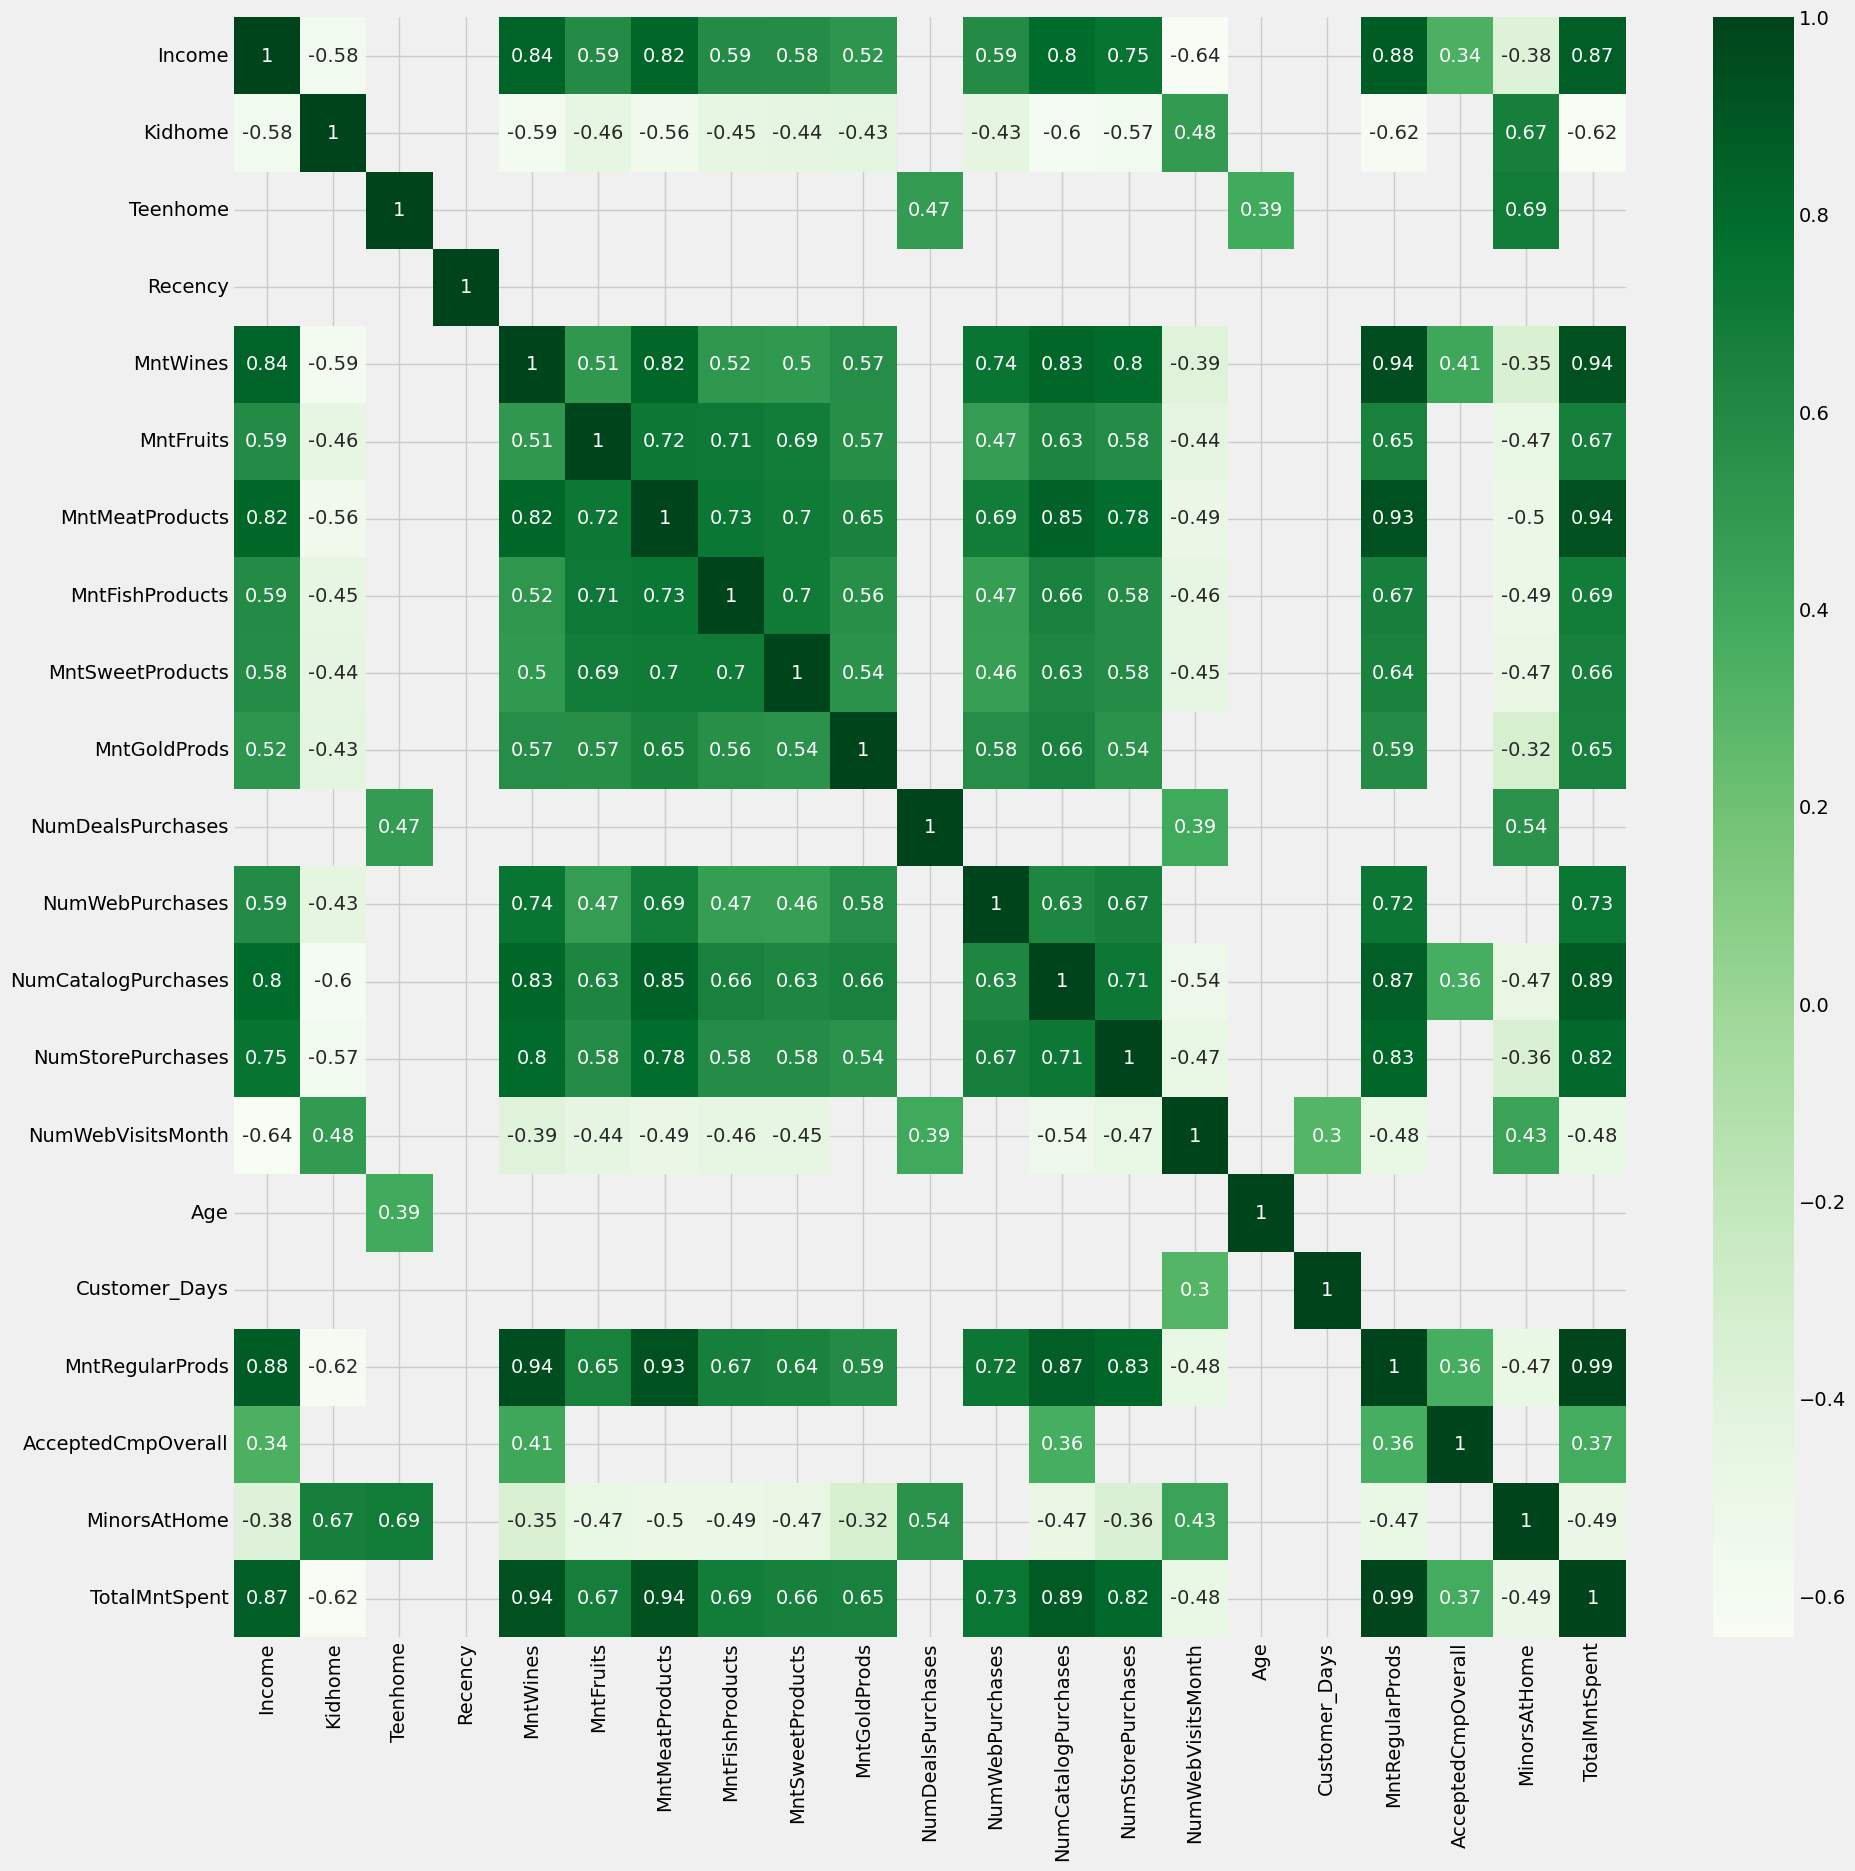

In [82]:
fig, ax = plt.subplots(figsize=(20, 20))
p = sns.heatmap(
    correlations[(correlations >= 0.3) | (correlations <= -0.3)],
    annot=True,
    cmap="Greens",
    ax=ax,
)

- The costumer income has a positive correlation with the amount spent in any product category
- The amount of kids has a negative correlation with the amount spent by the costumer
- The number of web visits per month has a negative correlation with amount spent and income

# Visualizing correlations

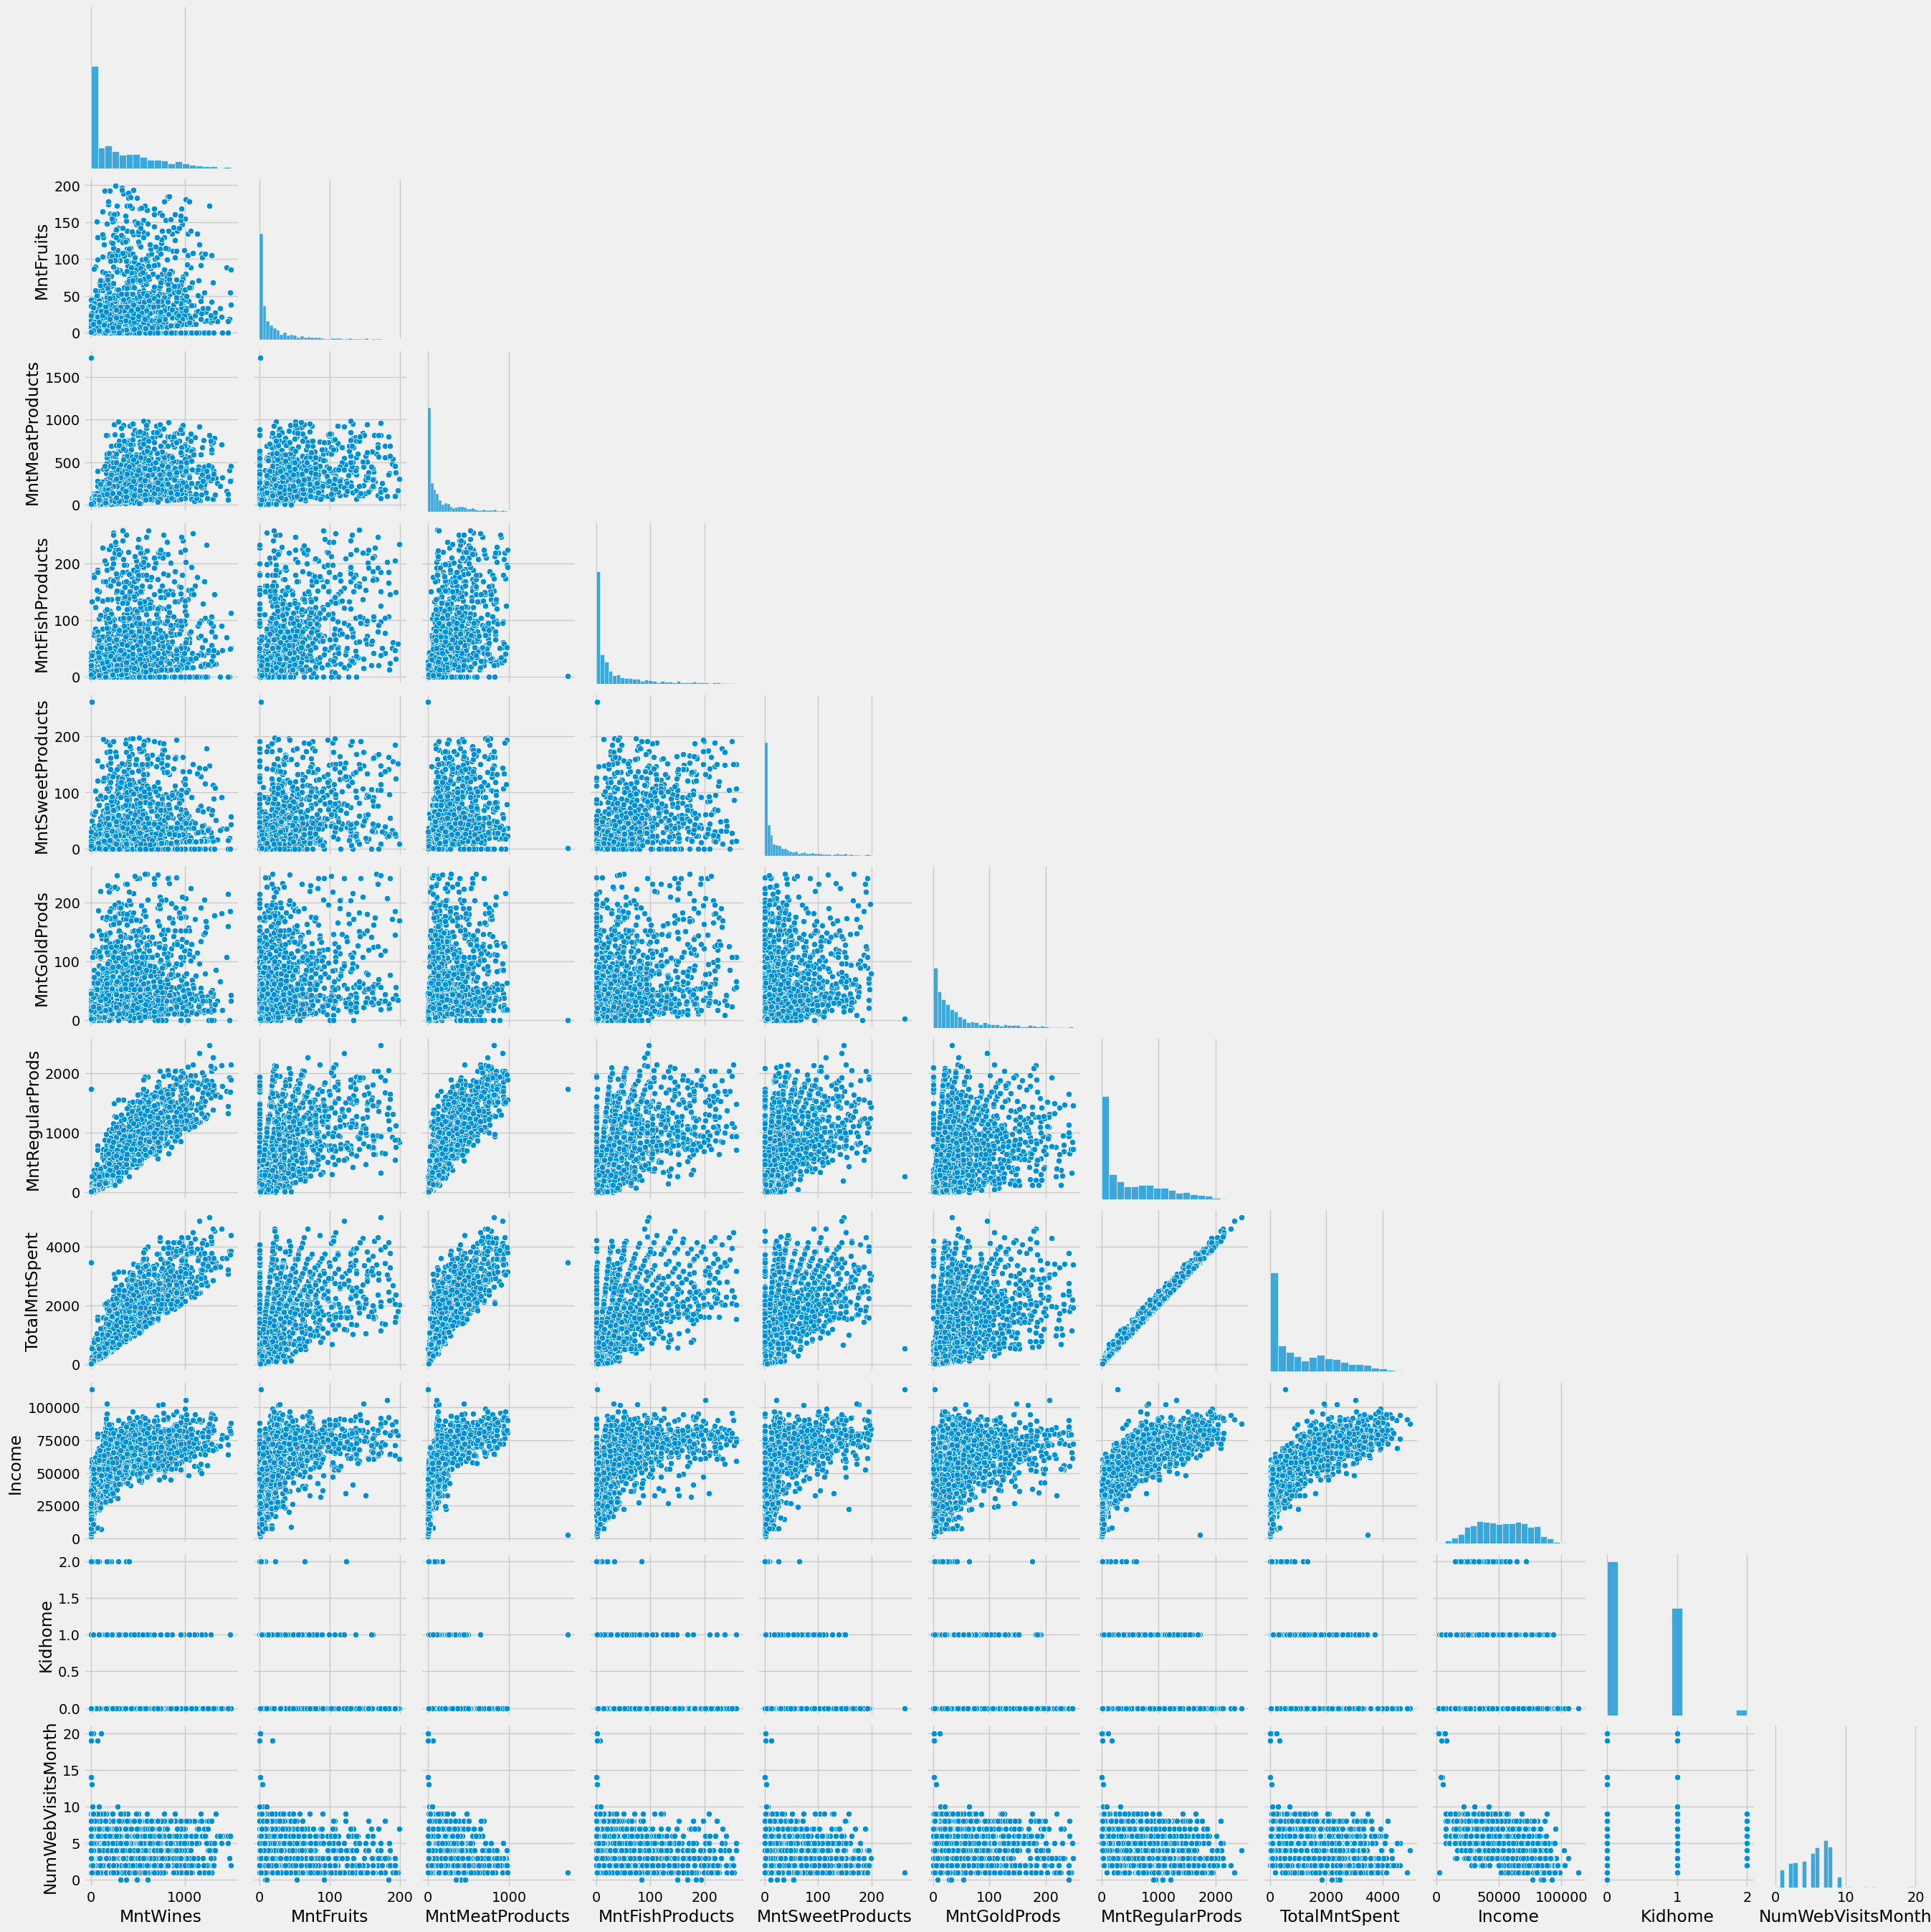

In [83]:
sns.pairplot(
    data[mnt_spent_cols + ["Income", "Kidhome", "NumWebVisitsMonth"]], corner=True
)


# Is there a significant difference in Income and amount of kids between costumers who have accepted de last campaign (Reponse) and those who didn't?

## Income
Hypotesis:  
    - H0: There is no difference.  
    - H1: There is a statistical significant difference between those 2 group  
    Alpha: 0.01

In [47]:
from scipy.stats import ttest_ind

data[data.Response == 0]["Income"].var(), data[data.Response == 1]["Income"].var()

(391523071.59587955, 536333463.0912769)

Using Welch’s t-test since the variance between groups is different

In [48]:
statistic, pvalue = ttest_ind(
    data[data.Response == 0]["Income"],
    data[data.Response == 1]["Income"],
    equal_var=False,
)
statistic, pvalue, pvalue < 0.01

(-7.136158295598029, 4.597658711396105e-12, True)

With an alpha of 0.01, we can reject the null hypothesis that there is no difference in Income between costumers who accepted the last campaign (Response) and those who didn't.

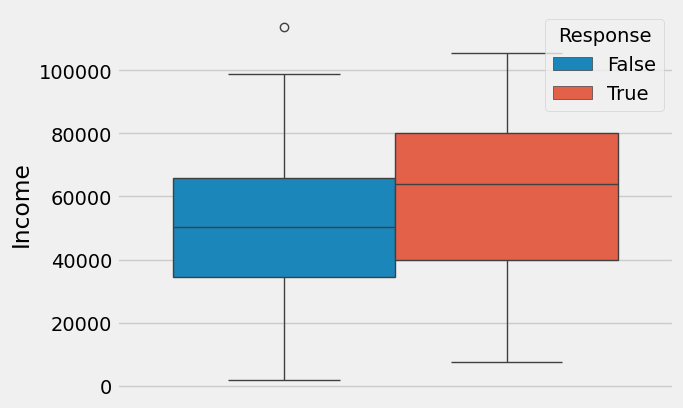

In [49]:
_ = sns.boxplot(data=data, y="Income", hue="Response")

With the boxplot analysis, we can assume that costumers with higher income are more likely to accept a campaign.

## Kids at home

Hypotesis:  
    - H0: There is no difference.  
    - H1: There is a statistical significant difference among costumers with different number of kids  
    Alpha: 0.01

In [60]:
from scipy.stats import chi2_contingency

contigency_table = pd.crosstab(index=data.Kidhome, columns=data.Response)
contigency_table


Response,False,True
Kidhome,,
0,956,207
1,712,102
2,39,2


In [62]:
statistics, pvalue, dof, expc_freq = chi2_contingency(contigency_table)
statistics, pvalue, pvalue < 0.01


(13.755970337344099, 0.0010302176703075362, True)

With an alpha of 0.01, we can reject the null hypothesis that there is no difference in Income among costumers with different number os kids

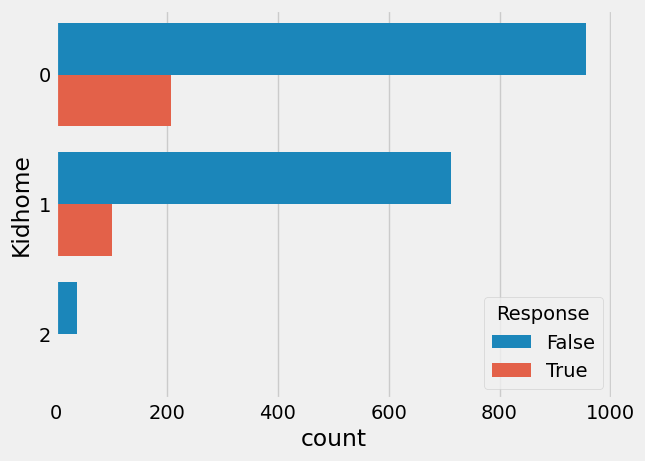

In [68]:
_ = sns.countplot(data=data, y="Kidhome", hue="Response")

With countplot analysis, we can tell that costumers with less kids are more likely to accepte a campaign

# Exporting the data after eda

In [94]:
data.to_pickle("data_after_eda.pkl")

# .